In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image

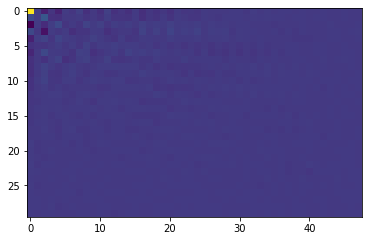

In [5]:
img = np.float32(np.array(Image.open("babooneye.png").convert('L')))
dct = cv2.dct(img)
plt.imshow(dct)

In [17]:
def dct_1d(image, nc):
    
    n = len(image)
    
    newImage = np.zeros_like(image).astype(float)
    
    
    for k in range(n):
        soma = 0
        for l in range(n):
            soma += image[l] * np.cos(2* np.pi * k / (2.0 * n) * l + (k * np.pi) / (2.0 * n))
        
        ck = np.sqrt(0.5) if k == 0 else 1
        
        newImage[k] = np.sqrt(2.0 / n) * ck * soma
        
    if nc > 0:
        newImage.sort()
        for i in range(nc, n):
            newImage[i] = 0
            
            
    return newImage

In [38]:
def dct_2d(image, nc):
    
    R = image.shape[0]
    C = image.shape[1]
    
    imageRow = np.zeros_like(image).astype(float)
    imageCol = np.zeros_like(image).astype(float)
    
    # Aplicando DCT nas linhas
    for m in range(R):
        imageRow = dct_1d(image[m, :], nc)
    
    # Aplicando DCT nas colunas    
    for n in range(C):
        imageCol = dct_1d(imageRow[:, n], nc)
        
    return imageCol

In [43]:
from math import cos, pi, sqrt
import numpy as np


def dct_2d(image, numberCoefficients=0):
    
    nc = numberCoefficients # passando para NC para melhorar a visibilidade da formula
    height = image.shape[0]
    width = image.shape[1]
    imageRow = np.zeros_like(image).astype(float)
    imageCol = np.zeros_like(image).astype(float)

    for h in range(height):
        imageRow[h, :] = dct_1d(image[h, :], nc) # aplicando IDCT na linhas
    for w in range(width):
        imageCol[:, w] = dct_1d(imageRow[:, w], nc) # aplicando IDCT nas colunas

    return imageCol

def dct_1d(image, numberCoefficients=0):
    
    nc = numberCoefficients
    n = len(image)
    newImage= np.zeros_like(image).astype(float)

  
    for k in range(n):
        sum = 0
        for i in range(n):
            sum += image[i] * cos(2 * pi * k / (2.0 * n) * i + (k * pi) / (2.0 * n))
        ck = sqrt(0.5) if k == 0 else 1
        newImage[k] = sqrt(2.0 / n) * ck * sum

    # salvando os N maiores numeros e zerandos todos os outros
    if nc > 0:
        newImage.sort()
        for i in range(nc, n):
            newImage[i] = 0

    return newImage # retorno de um VETOR

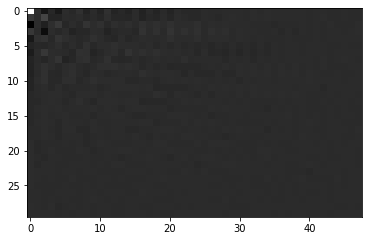

In [48]:
img = cv2.imread("babooneye.png", 0)
dct = dct_2d(img, 0)
plt.imshow(dct, cmap = 'gray')

In [50]:
def idct_2d(image):
    
    height = image.shape[0]
    width =  image.shape[1]
    imageRow = np.zeros_like(image).astype(float)
    imageCol = np.zeros_like(image).astype(float)

  
    for h in range(height):
        imageRow[h, :] = idct_1d(image[h, :]) # aplicando IDCT na linhas
    for w in range(width):
        imageCol[:, w] = idct_1d(imageRow[:, w]) # aplicando IDCT nas colunas

    return imageCol

def idct_1d(image):
   
    n = len(image)
    newImage = np.zeros_like(image).astype(float)

    for i in range(n):
        sum = 0
        for k in range(n):
            ck = sqrt(0.5) if k == 0 else 1 # operador tenario para verificar o valor do CK
            sum += ck * image[k] * cos(2 * pi * k / (2.0 * n) * i + (k * pi) / (2.0 * n))

        newImage[i] = sqrt(2.0 / n) * sum

    return newImage

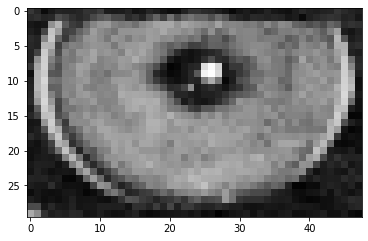

In [52]:
idct = idct_2d(dct)
plt.imshow(idct, cmap = 'gray')

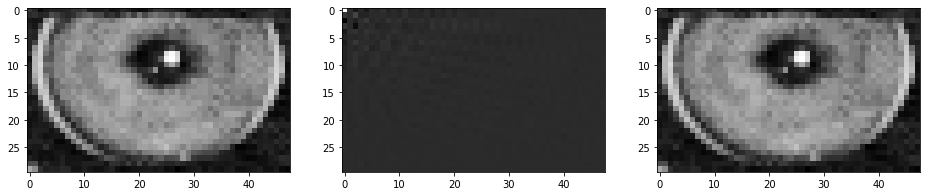

In [55]:
fig, axs = plt.subplots(1, 3, figsize = (16,16))
axs[0].imshow(img, cmap = 'gray')
axs[1].imshow(dct, cmap = 'gray')
axs[2].imshow(idct, cmap = 'gray')
plt.show()

In [80]:
class DCT:
    
    def __init__(self):
        self.input_dct2d = None
        self.output_dct2d = None
        
        self.input_idct2d = None
        self.output_idct2d = None
        
    def dct_2d(self, img_arr, n_coef = 0):
        self.input_dct2d = img_arr
        
        image = img_arr
        nc = n_coef
        rows = img_arr.shape[0]
        cols = img_arr.shape[1]
        
        imageRow = np.zeros_like(image).astype(float)
        imageCol = np.zeros_like(image).astype(float)        
        
        for row in range(rows):
            imageRow[row, :] = self.dct_1d(image[row, :], nc) # aplicando DCT na linhas
        
        for col in range(cols):
            imageCol[:, col] = self.dct_1d(imageRow[:, col], nc) # aplicando DCT nas colunas
        
        #plt.imshow(imageCol, cmap = 'gray')
        
        self.output_dct2d = imageCol
        
        return imageCol
    
    def dct_1d(self, image, n_coef = 0):
        
        nc = n_coef
        
        n = len(image)
        newImage= np.zeros_like(image).astype(float)


        for k in range(n):
            sum = 0
            for i in range(n):
                sum += image[i] * cos(2 * pi * k / (2.0 * n) * i + (k * pi) / (2.0 * n))
                
            ck = sqrt(0.5) if k == 0 else 1
            newImage[k] = sqrt(2.0 / n) * ck * sum

        # salvando os N maiores numeros e zerandos todos os outros
        if nc > 0:
            newImage.sort()
            for i in range(nc, n):
                newImage[i] = 0

        return newImage # retorno de um VETOR
    
    def idct_2d(self, img_arr = None):
        
        if type(img_arr) == type(None):
            img_arr = self.output_dct2d
            
        image = img_arr
        self.input_idct2d = img_arr
        
        rows = image.shape[0]
        cols =  image.shape[1]
        imageRow = np.zeros_like(image).astype(float)
        imageCol = np.zeros_like(image).astype(float)


        for row in range(rows):
            imageRow[row, :] = self.idct_1d(image[row, :]) # aplicando IDCT na linhas
            
        for col in range(cols):
            imageCol[:, col] = self.idct_1d(imageRow[:, col]) # aplicando IDCT nas colunas
        
        
        #plt.imshow(imageCol, cmap = 'gray')
        self.output_idct2d = imageCol
        
        return imageCol
        
    def idct_1d(self, image):
   
        n = len(image)
        newImage = np.zeros_like(image).astype(float)

        for i in range(n):
            sum = 0
            for k in range(n):
                ck = sqrt(0.5) if k == 0 else 1 # operador tenario para verificar o valor do CK
                sum += ck * image[k] * cos(2 * pi * k / (2.0 * n) * i + (k * pi) / (2.0 * n))

            newImage[i] = sqrt(2.0 / n) * sum

        return newImage
    
    def show_process(self):
        
        fig, axs = plt.subplots(1, 3, figsize = (16,16))
        axs[0].imshow(self.input_dct2d, cmap = 'gray')
        axs[1].imshow(self.output_dct2d, cmap = 'gray')
        axs[2].imshow(self.output_idct2d, cmap = 'gray')
        plt.show()

In [83]:
conv = DCT()

dct = conv.dct_2d(img, 0)
idct = conv.idct_2d()

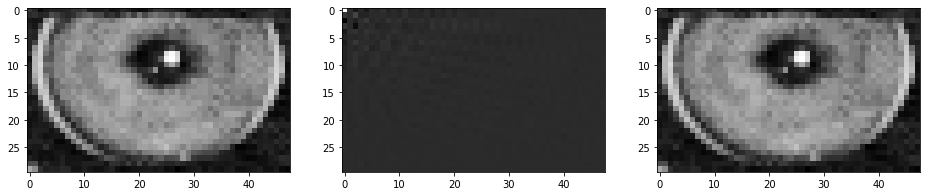

In [84]:
conv.show_process()